# London Houses price analysis

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Loading Dataset

In [3]:
data = pd.read_csv(r'C:\Users\DELL\Desktop\London Housing Data.csv')
data.head(6) #view first six row data's

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
5,6/1/1995,city of london,94901,E09000001,17.0,NaN


# Explore dataset

In [4]:
data.shape

(13549, 6)

In [5]:
data.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


Data type of date column is in object.We will convert it later into datetime .

In [7]:
data.value_counts

<bound method DataFrame.value_counts of             date            area  average_price       code  houses_sold  \
0       1/1/1995  city of london          91449  E09000001         17.0   
1       2/1/1995  city of london          82203  E09000001          7.0   
2       3/1/1995  city of london          79121  E09000001         14.0   
3       4/1/1995  city of london          77101  E09000001          7.0   
4       5/1/1995  city of london          84409  E09000001         10.0   
...          ...             ...            ...        ...          ...   
13544   9/1/2019         england         249942  E92000001      64605.0   
13545  10/1/2019         england         249376  E92000001      68677.0   
13546  11/1/2019         england         248515  E92000001      67814.0   
13547  12/1/2019         england         250410  E92000001          NaN   
13548   1/1/2020         england         247355  E92000001          NaN   

       no_of_crimes  
0               NaN  
1              

In [8]:
data.isnull().sum() #checking null data's

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

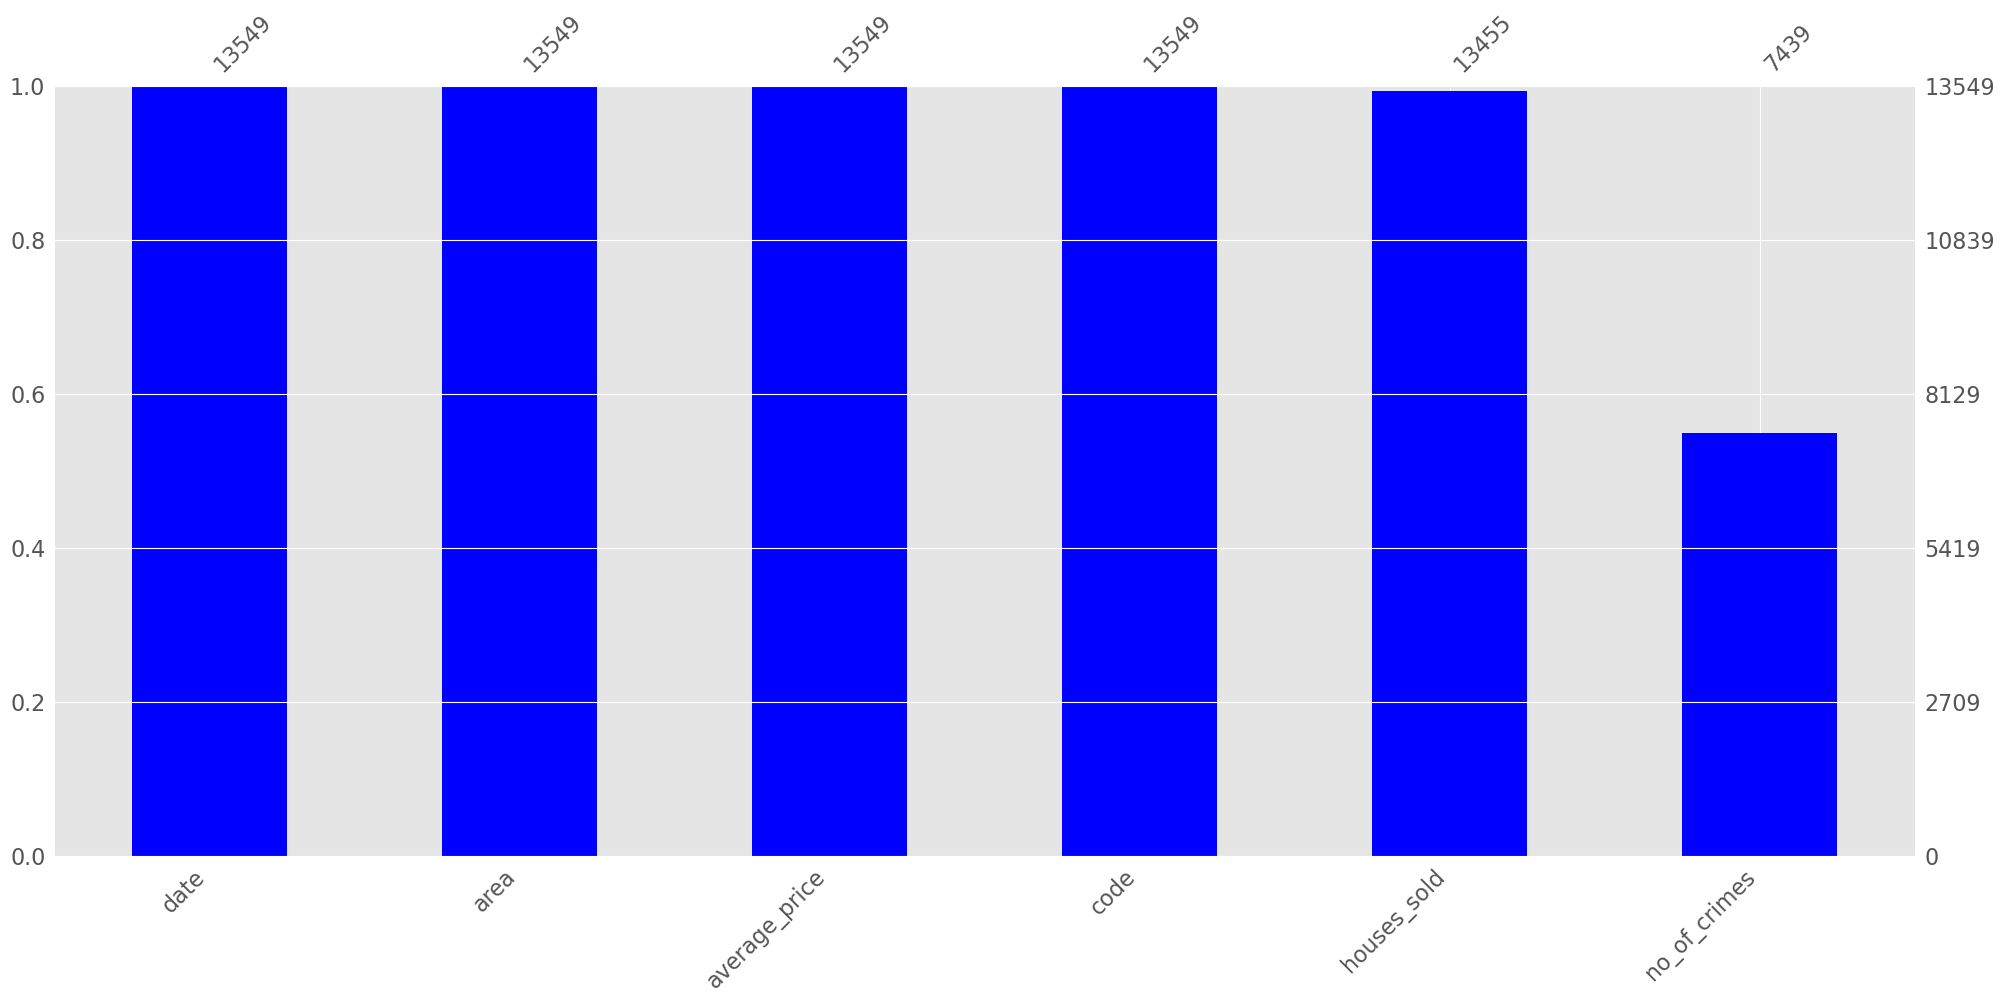

In [9]:
import missingno as msno
msno.bar(data,color='blue')
plt.show()

We can clearly visualize that (13549-7439) = 6110 data's are missing in no_of_crimes column and in houses_sold column 
(13549-13455) = 94 data's are missing

# Data preprocessing

In [10]:
data.date = pd.to_datetime(data.date) # convert data type of date column into datetime
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


In [11]:
data['total_price'] = data['average_price']*data['houses_sold']

In [12]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,total_price
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1554633.0
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,575421.0
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1107694.0
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,539707.0
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,844090.0


In [13]:
#Drop unused column
df = data.drop('code',axis=1)
df.head()

,date,area,average_price,houses_sold,no_of_crimes,total_price
0,1995-01-01,city of london,91449,17.0,NaN,1554633.0
1,1995-02-01,city of london,82203,7.0,NaN,575421.0
2,1995-03-01,city of london,79121,14.0,NaN,1107694.0
3,1995-04-01,city of london,77101,7.0,NaN,539707.0
4,1995-05-01,city of london,84409,10.0,NaN,844090.0


In [14]:
# Basic Statistics
df[['average_price','houses_sold','no_of_crimes']].describe()

,average_price,houses_sold,no_of_crimes
count,1.354900e+04,13455.000000,7439.000000
mean,2.635197e+05,3893.994129,2158.352063
std,1.876175e+05,12114.402476,902.087742
min,4.072200e+04,2.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000
50%,2.229190e+05,371.000000,2132.000000
75%,3.368430e+05,3146.000000,2582.000000
max,1.463378e+06,132163.000000,7461.000000


# Houses price distribution

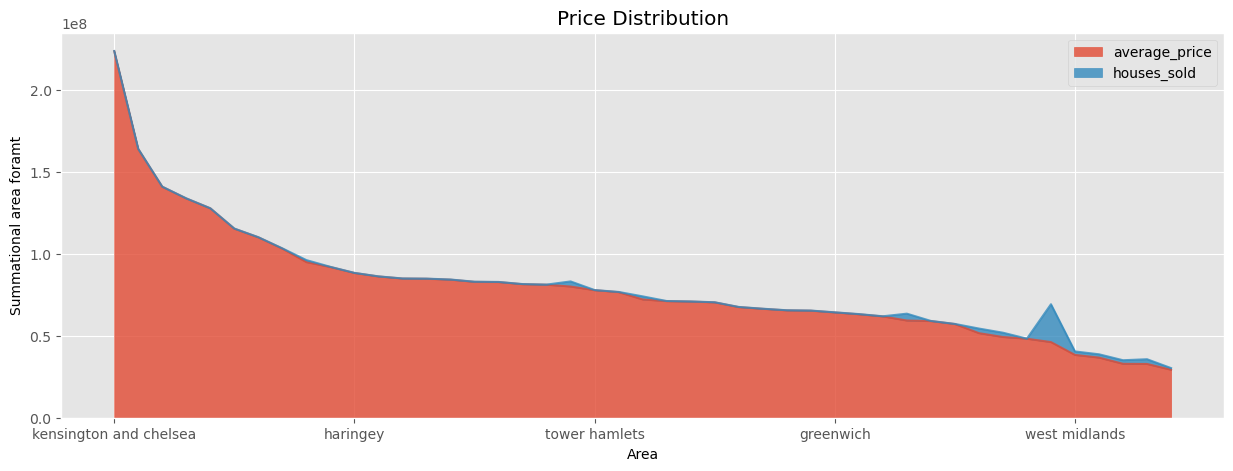

In [36]:
df1 = data[['area','average_price','houses_sold']]
df3 = df1.groupby('area').agg({'average_price':'sum','houses_sold':'sum'})
df3 = df3.reset_index().sort_values(by='average_price',ascending=False)
ax = df3.plot(kind='area',x='area',alpha = 0.8,figsize=(15,5))
ax.set_xlabel('Area')
ax.set_ylabel('Summational area foramt')
ax.set_title('Price Distribution')
plt.show()

In [37]:
grp_by_area = data.groupby('area')['average_price'].agg('sum').reset_index()
grp_by_area = grp_by_area.sort_values(by='average_price',ascending=False)
grp_by_area

,area,average_price
23,kensington and chelsea,223360171
43,westminster,163703647
5,camden,140717774
15,hammersmith and fulham,133581350
6,city of london,127606718
34,richmond upon thames,115167404
22,islington,109921503
41,wandsworth,103033564
21,inner london,94813321
1,barnet,91802318


In [38]:
grp = px.bar(grp_by_area,x='area',y='average_price',color='area',
             title="Average price of houses in different area's of London City")
grp.show()

The average price of houses is maximum in kensington and chelsea. 

In [39]:
grp = data.groupby(data.date.dt.year)['average_price'].max().reset_index()
new = grp.rename(columns={'date':'Date','average_price':'Average_price'})
df2 = pd.DataFrame(new)
df2

,Date,Average_price
0,1995,200722
1,1996,223197
2,1997,265112
3,1998,277600
4,1999,354241
5,2000,397353
6,2001,451028
7,2002,497538
8,2003,488704
9,2004,559286


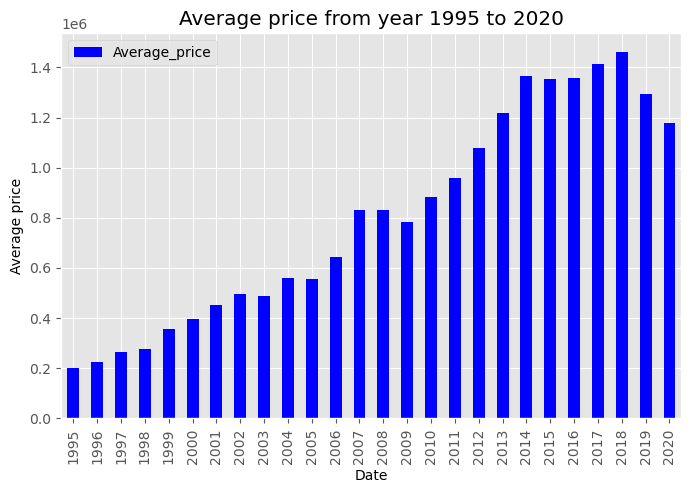

In [40]:
ax = df2.plot(kind='bar',x='Date',y='Average_price',color='blue',figsize=(8,5)
              ,legend=True)
ax.set_title('Average price from year 1995 to 2020')
ax.set_xlabel('Date')
ax.set_ylabel('Average price')
plt.show()

The average price of houses in London has changed over the years. According to the graph, the average price of houses in London ranged from £22,119 in 1995 to £1,463,378 in 2018. The prices have generally increased over time, indicating a positive trend in the housing market in London.

In [41]:
grp_by_housesold = data.groupby('area')['houses_sold'].agg('sum')
grp_by_housesold = grp_by_housesold.reset_index().sort_values(by='houses_sold',ascending=False)
grp_by_housesold

,area,houses_sold
12,england,23077637.0
35,south east,4195116.0
27,london,3134378.0
31,north west,2895280.0
10,east of england,2809800.0
36,south west,2639661.0
44,yorks and the humber,2183762.0
42,west midlands,2128978.0
9,east midlands,2033724.0
32,outer london,1897009.0


The area in London with the highest number of houses sold is England, with a total of 23077637 houses sold. Other areas with high numbers of houses sold include Lambeth, Camden, Southwark, and Newham.

In [47]:
fig = px.bar(grp_by_housesold.head(15),x='area',y='houses_sold',color='area',text_auto = True)
fig.show()

In [44]:
crimes_in_area = data.groupby('area')['no_of_crimes'].agg('sum')
crimes_in_area = crimes_in_area.reset_index().sort_values(by='no_of_crimes',ascending=False)
crimes_in_area[crimes_in_area['no_of_crimes']==0]

,area,no_of_crimes
12,england,0.0
42,west midlands,0.0
9,east midlands,0.0
10,east of england,0.0
35,south east,0.0
36,south west,0.0
21,inner london,0.0
32,outer london,0.0
31,north west,0.0
30,north east,0.0


In [45]:
crimesAvailable=crimes_in_area[crimes_in_area['no_of_crimes']>0]
crimesAvailable

,area,no_of_crimes
43,westminster,1211743.0
25,lambeth,719454.0
5,camden,699955.0
37,southwark,693541.0
29,newham,652978.0
7,croydon,607524.0
8,ealing,597017.0
14,hackney,589847.0
39,tower hamlets,582176.0
22,islington,576162.0


In [48]:
crimes =  px.bar(crimesAvailable,x='area',y='no_of_crimes',color='area',text_auto=True)
crimes.show()

The area with the highest number of crimes is Westminster, followed by Lambeth, Camden, Southwark, and Newham.

# Linear Regression

Making a simple linear model which predict houses price

In [25]:
df2

,Date,Average_price
0,1995,200722
1,1996,223197
2,1997,265112
3,1998,277600
4,1999,354241
5,2000,397353
6,2001,451028
7,2002,497538
8,2003,488704
9,2004,559286


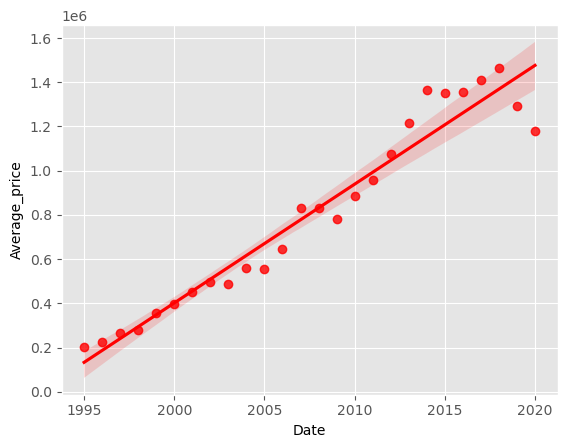

In [26]:
# findout the linear relation using regplot
sns.regplot(data=df2,x='Date',y='Average_price',color='r')
plt.show()

The fit-line implies that there is a linear relation between the year and average price. As the year
increasing the houses price inreases as well.

In [27]:
#Independent Variable(feature)
x=df2.iloc[:,0:1]

In [28]:
#Dependent Variable(Traget)
y=df2.iloc[:,1:2]

In [29]:
#Split the dataset into train set and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
#Select regression model
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [31]:
#predict output
prdict = lreg.predict(x_test)
prdict

array([[ 248602.87388724],
       [1201263.25074184],
       [ 883709.79179031],
       [1042486.52126607],
       [ 407379.60336301],
       [ 724933.06231454]])

In [32]:
y_test.values

array([[ 265112],
       [1353679],
       [ 782459],
       [1077366],
       [ 397353],
       [ 644541]], dtype=int64)

In [33]:
print(f"accuracy:{round(lreg.score(x_test,y_test)*100,2)}%")

accuracy:95.07%


In [34]:
# Take a sample year
lreg.predict([[2022]])

array([[1571742.28618529]])

Our model Working Good as expectation

In [35]:
from sklearn.metrics import r2_score,accuracy_score
import numpy as np

print(r2_score(y_test,prdict))

0.9507401522981854


The nearar the value of r2_score to 1 the better the model will be.

# summary

In our project report, we analyze the prices of houses in London using a dataset. We explore the dataset, performs data preprocessing, and visualizes the distribution of house prices in different areas of London.We also examines the average price trends over the years and identifies the area in London with the highest number of houses sold. The average price of houses in London has generally increased over the years, with Kensington and Chelsea being the area with the highest average price. Overall, the article provides inights into the housing market in London .